<a href="https://colab.research.google.com/github/CALORIO-Jeff-Klien/Simulation/blob/main/Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# genetic_algorithm.py

In [1]:
import numpy as np

var_values = [1,-3,4.5,2]
num_coeff = 4
pop_chrom = 10
sel_rate = 5

pop_size = (pop_chrom,num_coeff)
pop_new = np.random.uniform(low=-10.0, high=10.0, size=pop_size)
print(pop_new)

num_gen = 100
for k in range(num_gen):
    fitness = np.sum(pop_new *var_values, axis=1)
    par_sel = np.empty((sel_rate, pop_new.shape[1]))
    print("Current generation = ", k)
    print("Best fitness value : ", np.max(fitness))

    for i in range(sel_rate):
        sel_id = np.where(fitness == np.max(fitness))
        sel_id = sel_id[0][0]
        par_sel[i, :] = pop_new[sel_id, :]
        fitness[sel_id]=np.min(fitness)

    offspring_size=(pop_chrom-sel_rate, num_coeff)
    offspring = np.empty(offspring_size)
    crossover_lenght = int(offspring_size[1]/2)

    for j in range(offspring_size[0]):
        par1_id = np.random.randint(0,par_sel.shape[0])
        par2_id = np.random.randint(0,par_sel.shape[0])
        offspring[j, 0:crossover_lenght] = par_sel[par1_id, 0:crossover_lenght]
        offspring[j, crossover_lenght:] = par_sel[par2_id, crossover_lenght:]


    for m in range(offspring.shape[0]):
        mut_val = np.random.uniform(-1.0, 1.0)
        mut_id = np.random.randint(0,par_sel.shape[1])
        offspring[m, mut_id] = offspring[m, mut_id] + mut_val

    pop_new[0:par_sel.shape[0], :] = par_sel
    pop_new[par_sel.shape[0]:, :] = offspring


fitness = np.sum(pop_new *var_values, axis=1)
best_id = np.where(fitness == np.max(fitness))
print("Optimized coefficient values = ", pop_new[best_id, :])
print("Maximum value of y = ", fitness[best_id])

[[-6.54409334 -6.95333987  3.08721281 -0.47176164]
 [ 2.30557928 -7.45951546 -0.96702633  3.62489509]
 [ 3.4837875  -3.89484737 -5.92750156  1.63441385]
 [-2.02735519  2.1552199  -1.05728512  6.84215647]
 [ 9.2895343  -7.71396642  6.44908069 -6.76139504]
 [ 8.30150404 -3.41815877 -6.16139531  4.44097768]
 [ 2.00765564  1.93966862  3.29396853 -7.12284448]
 [-5.15489619 -1.9614621  -7.49270939  4.36737854]
 [-6.38090103  7.07991503  2.63889681 -1.44687978]
 [-4.30257914  8.85525342  4.83861193 -3.90791955]]
Current generation =  0
Best fitness value :  47.929506587370994
Current generation =  1
Best fitness value :  47.929506587370994
Current generation =  2
Best fitness value :  47.929506587370994
Current generation =  3
Best fitness value :  50.9585525041724
Current generation =  4
Best fitness value :  50.9585525041724
Current generation =  5
Best fitness value :  50.9585525041724
Current generation =  6
Best fitness value :  53.232157040365465
Current generation =  7
Best fitness val

# symbolic_regression.py

In [5]:
!pip install gplearn

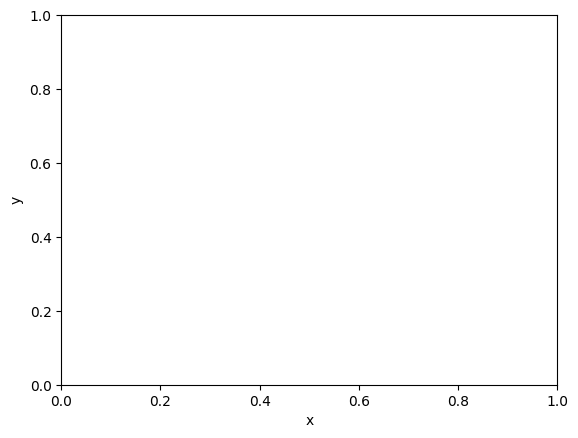

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    36.62            1.157        7         0.237825         0.184028     25.45s
   1     9.83          0.63691       11        0.0597335        0.0556074     16.93s
   2     7.14         0.468389        7                0                0     15.41s
add(mul(X1, X1), mul(X0, X0))
R2: 1.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gplearn.genetic import SymbolicRegressor

x = np.arange(-1, 1, 1/10.)
y = np.arange(-1, 1, 1/10.)
x, y = np.meshgrid(x, y)
f_values = x**2 + y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, f_values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


input_train = np.random.uniform(-1, 1, 200).reshape(100, 2)
output_train = input_train[:, 0]**2 + input_train[:, 1]**2

input_test = np.random.uniform(-1, 1, 200).reshape(100, 2)
output_test = input_test[:, 0]**2 + input_test[:, 1]**2

function_set = ['add', 'sub', 'mul']

sr_model = SymbolicRegressor(population_size=1000,function_set=function_set,
                           generations=10, stopping_criteria=0.001,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=1)
sr_model.fit(input_train, output_train)

print(sr_model._program)
print('R2:',sr_model.score(input_test,output_test))

# cellular_automata.py

Binary rule is: [0 1 1 1 1 1 1 0]


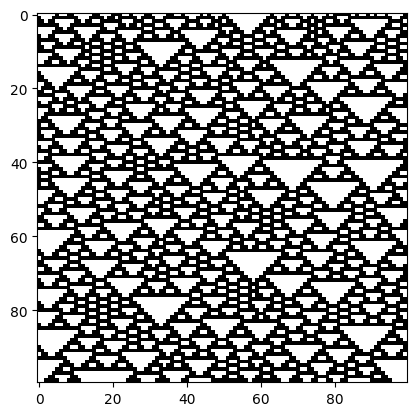

In [7]:
import numpy as np
import matplotlib.pyplot as plt

cols_num=100
rows_num=100
wolfram_rule=126
bin_rule = np.array([int(_) for _ in np.binary_repr(wolfram_rule, 8)])
print('Binary rule is:',bin_rule)

cell_state = np.zeros((rows_num, cols_num),dtype=np.int8)
cell_state[0, :] = np.random.randint(0,2,cols_num)

update_window= np.array([[4], [2], [1]])
for j in range(rows_num - 1):
    update = np.vstack((np.roll(cell_state[j, :], 1), cell_state[j, :],
                   np.roll(cell_state[j, :], -1))).astype(np.int8)
    rule_up = np.sum(update * update_window, axis=0).astype(np.int8)
    cell_state[j + 1, :] = bin_rule[7 - rule_up]


ca_img= plt.imshow(cell_state,cmap=plt.cm.binary)
plt.show()